### Import libraries.

In [263]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset into a dataframe object.
#### Using the pickled data from earlier, which preserved the time series indexing.

In [12]:
df = pickle.load(open("../datasets/occupancy.p", "rb"))

### Peek at the data. Quick check for consistency.

In [13]:
df.head()

,temperature,humidity,light,co2,humidity_ratio,occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


### Data dictionary.

|Feature Name|Feature Description|Units of Measurement|
|---|---|---|
|date|time the observation was recorded|year-month-day hour:minute:second|
|temperature|temperature recorded|Celsius|
|humidity|relative humidity recorded|%|
|light|light recorded at time of observation|Lux|
|co2|CO2 measured at the time of observation|ppm, parts per million|
|humidity_ration|derived quantity from temperature and relative humidity|kgwater-vapor/kg-air|
|occupancy|status of room occupancy|0 for not occupied, 1 for occupied status|

### Generate descriptive statistics.

In [148]:
df.describe()

,temperature,humidity,light,co2,humidity_ratio,occupancy
count,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000
mean,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120
std,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000
50%,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000
75%,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000


### Check how balanced our classes are.
#### Classes are imbalanced.

In [134]:
df['Occupancy'].value_counts(normalize=True)

0    0.78888
1    0.21112
Name: Occupancy, dtype: float64

### Histograms of each attribute.

In [14]:
df.columns

Index(['temperature', 'humidity', 'light', 'co2', 'humidity_ratio',
       'occupancy'],
      dtype='object')

##### temperature: right-skewed (positive skewness)  
##### co2: right-skewed (positive skewness)
##### humidity_ratio: right-skewed (positive skewness)

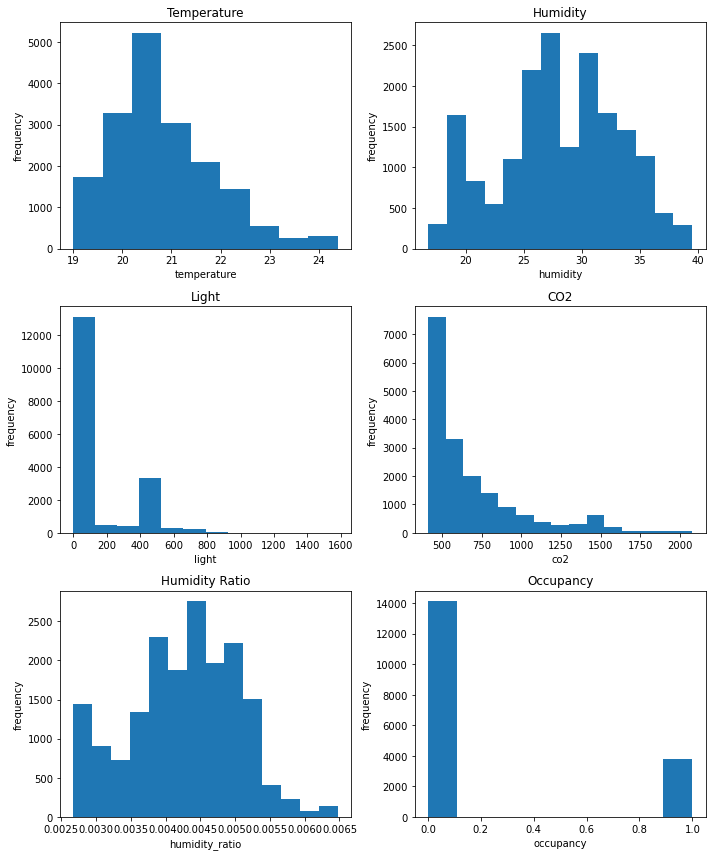

In [76]:
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
bins = [9, 14, 12, 15, 14, 9]
f, a = plt.subplots(3,2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(10)
for idx, ax in enumerate(a):
    ax.hist(df[xaxes[idx]], bins=bins[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel('frequency')
plt.tight_layout()

### Line plot for each attribute over time observed.

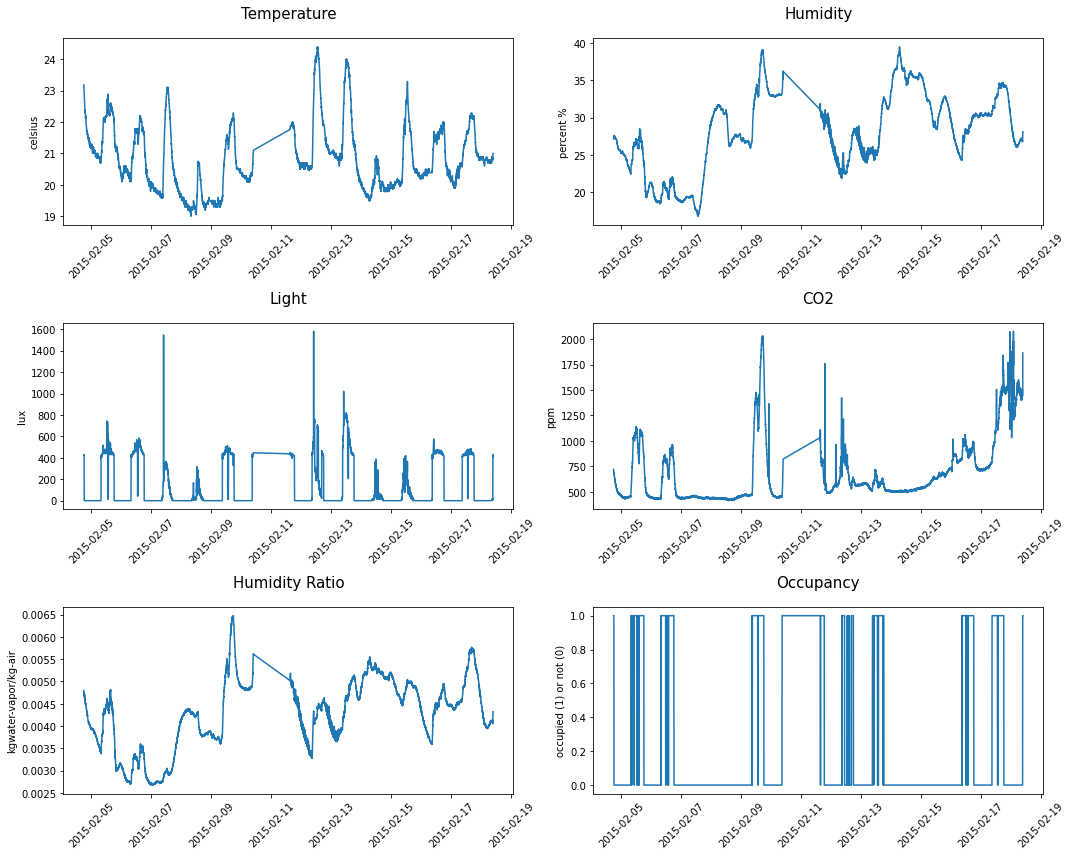

In [132]:
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
yaxes = ['celsius', 'percent %', 'lux', 'ppm', 'kgwater-vapor/kg-air', 'occupied (1) or not (0)']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']

f, a = plt.subplots(3,2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.plot(df.index, df[xaxes[idx]])
    ax.set_title(titles[idx], fontsize=15, pad=20, loc='center')
    ax.set_ylabel(yaxes[idx])

plt.tight_layout()
plt.show()

### Scale data and plot the mean for each day, then compare attribute mean over time.
#### Notice the humidity and humidity_ratio are moving together - which makes sense, given humidity_ratio is calculated using humidity and temperature (see data dictionary). This tells us humidity and humidity_ratio are correlated, which may be useful to know later, for modeling.

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_sc = pd.DataFrame(ss.fit_transform(df), df.index, df.columns)

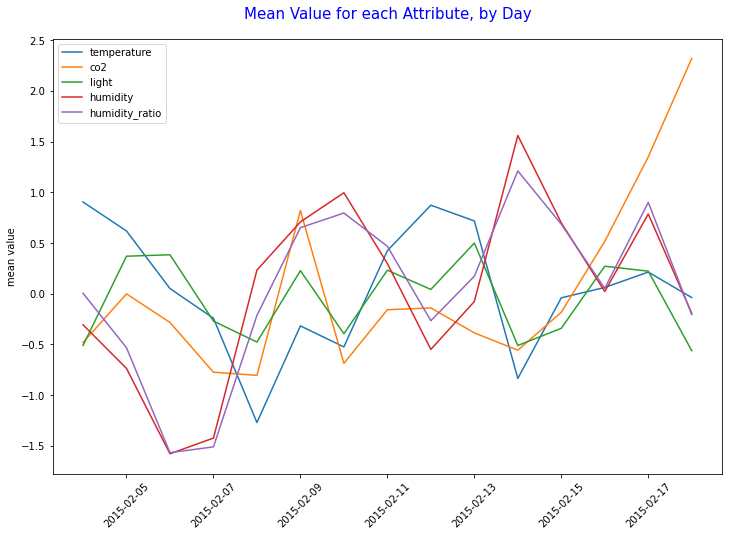

In [241]:
mean_temp_by_day = df_sc.resample('D').mean()['temperature']
mean_co2_by_day = df_sc.resample('D').mean()['co2']
mean_light_by_day = df_sc.resample('D').mean()['light']
mean_humidity_by_day = df_sc.resample('D').mean()['humidity']
mean_humidity_ratio_by_day = df_sc.resample('D').mean()['humidity_ratio']
dates = df_sc.resample('D').mean().index

plt.figure(figsize=(12,8))
plt.plot(dates, mean_temp_by_day, label='temperature')
plt.plot(dates, mean_co2_by_day, label='co2')
plt.plot(dates, mean_light_by_day, label='light')
plt.plot(dates, mean_humidity_by_day, label='humidity')
plt.plot(dates, mean_humidity_ratio_by_day, label='humidity_ratio')
plt.title('Mean Value for each Attribute, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('mean value')
plt.legend()
plt.show()

### Which day has the highest number of observations marked "occupied"?
##### 2015-02-06 has the highest number of observations marked "occupied".
##### 2015-02-07 and 2015-02-08 are weekend days (Sat/Sun), hence occupancy count 0 makes sense.
##### 2015-02-14 and 2015-02-15 are also weekend days, occupancy count 0.

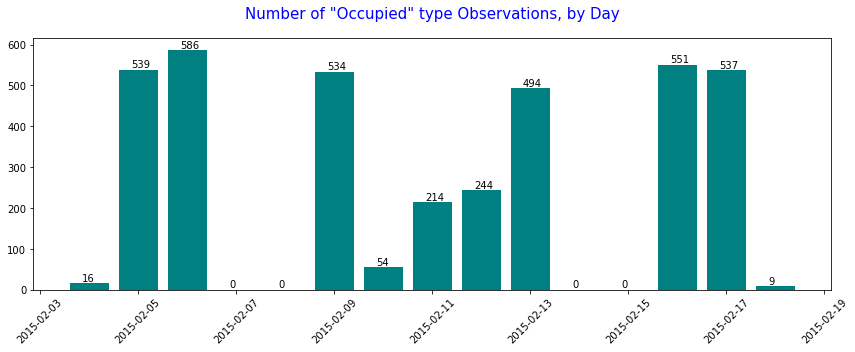

In [246]:
occupancy_by_day = df['occupancy'].resample('D').sum()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, occupancy_by_day, color='teal')

plt.title('Number of "Occupied" type Observations, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+5, yval)

plt.tight_layout()
plt.show()

### Are we observing the same number of recorded observations for each day?
##### No. 
##### 4, 10, 11, and 18 are days with significantly less number of observations.

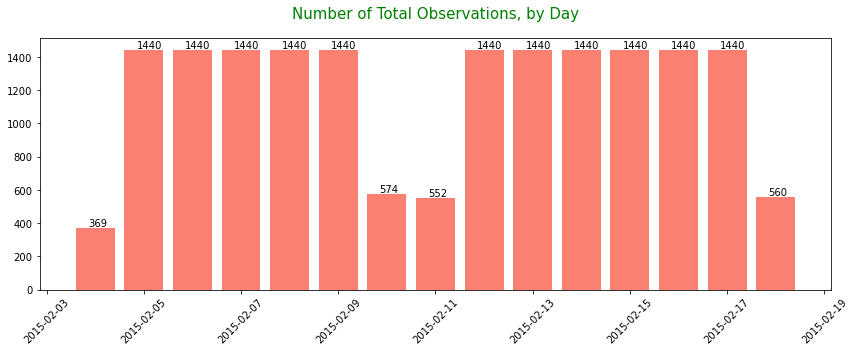

In [253]:
observations_by_day = df['occupancy'].resample('D').count()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, observations_by_day, color='salmon')

plt.title('Number of Total Observations, by Day', fontsize=15, pad=20, color='green')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+10, yval)

plt.tight_layout()
plt.show()

### Scale data and plot the rolling (60) mean for each day, then compare attribute mean over time.
##### I chose 60 because observations are recorded every minute, so a rolling 60 would give us the mean for the previous hour.
##### Again, humidity and humidity_ratio are moving together.

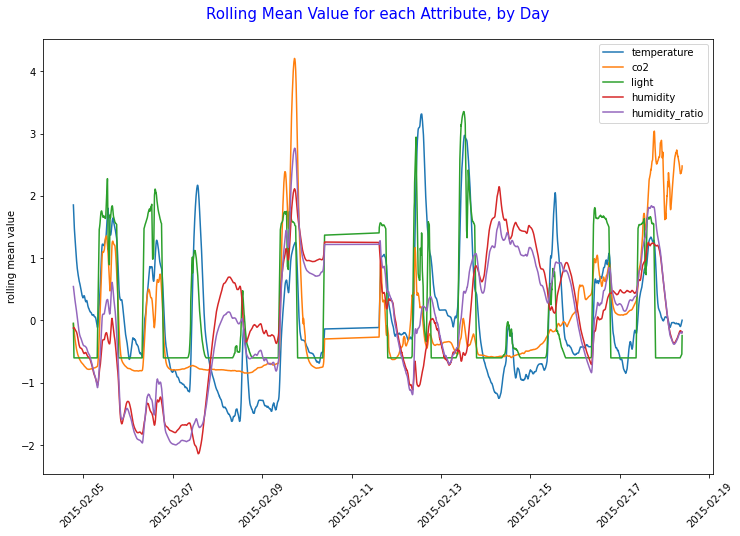

In [262]:
temp_roll_mean = df_sc.rolling(60).mean()['temperature']
co2_roll_mean = df_sc.rolling(60).mean()['co2']
light_roll_mean = df_sc.rolling(60).mean()['light']
humidity_roll_mean = df_sc.rolling(60).mean()['humidity']
humidity_ratio = df_sc.rolling(60).mean()['humidity_ratio']
dates = df_sc.index

plt.figure(figsize=(12,8))
plt.plot(dates, temp_roll_mean, label='temperature')
plt.plot(dates, co2_roll_mean, label='co2')
plt.plot(dates, light_roll_mean, label='light')
plt.plot(dates, humidity_roll_mean, label='humidity')
plt.plot(dates, humidity_ratio, label='humidity_ratio')
plt.title('Rolling Mean Value for each Attribute, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('rolling mean value')
plt.legend()
plt.show()

### Check the stationarity for each variable.

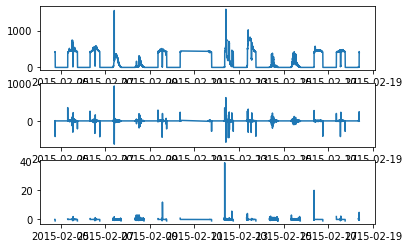

In [254]:
fig, axes = plt.subplots(3,1)
axes[0].plot(df['light']);
axes[1].plot(df['light'].diff());
axes[2].plot(df['light'].pct_change());

### Do we observe any significant correlation between attributes/features and the occupancy class?
##### There is a high positive correlation between occupancy and temperature, light, co2.
##### This information will be useful later, in modeling, when choosing best features to predict occupancy.

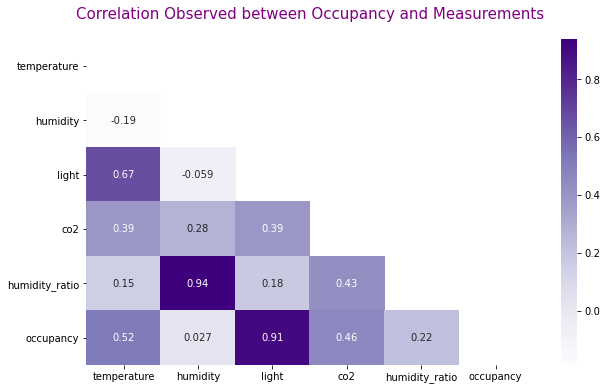

In [274]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='Purples')
plt.title('Correlation Observed between Occupancy and Measurements', fontsize=15, pad=20, color='purple')
plt.show()